In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
ds= r"C:/AICTC/Edunet IBM/Crop Diseases Dataset/Crop Diseases/Crop___Disease"
img_size = (224, 224)    
batch_size = 32

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,       
    rotation_range=20,     
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True, 
    validation_split=0.2   
)


In [4]:
train_generator = datagen.flow_from_directory(
    ds,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",   
    subset="training",
    shuffle=True
)


Found 10661 images belonging to 5 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    ds,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 2663 images belonging to 5 classes.


In [6]:
print("Total classes found:", len(train_generator.class_indices))
print("Class mapping:", train_generator.class_indices)

Total classes found: 5
Class mapping: {'Corn': 0, 'Potato': 1, 'Rice': 2, 'Wheat': 3, 'sugarcane': 4}


In [7]:
x_batch, y_batch = next(train_generator)  

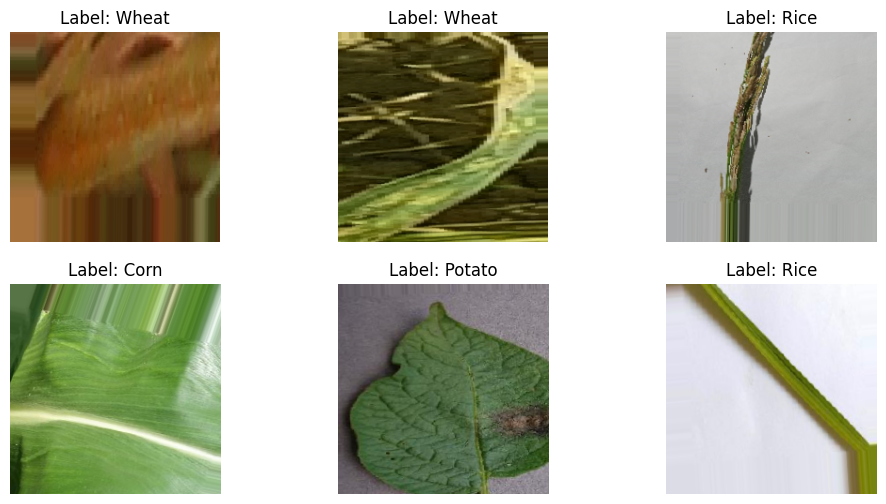

In [8]:

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])  
    plt.title(f"Label: {list(train_generator.class_indices.keys())[y_batch[i].argmax()]}")
    plt.axis("off")
plt.show()


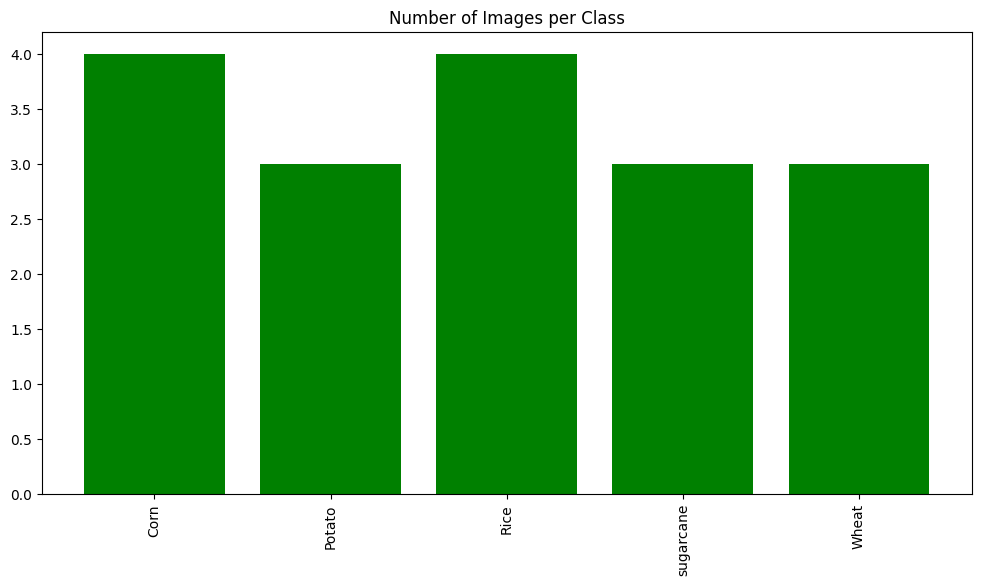

In [12]:
import os
import random
import matplotlib.image as mpimg
folders = os.listdir(ds)
counts = [len(os.listdir(os.path.join(ds, folder))) for folder in folders]

plt.figure(figsize=(12,6))
plt.bar(folders, counts, color='green')
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.show()

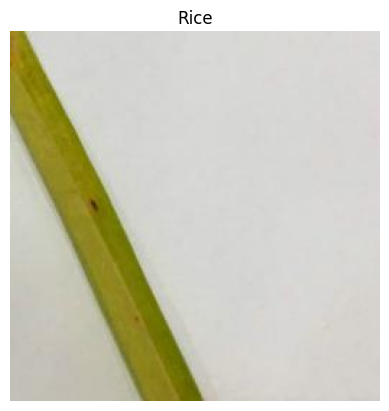

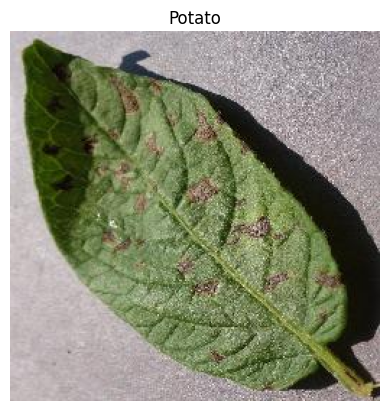

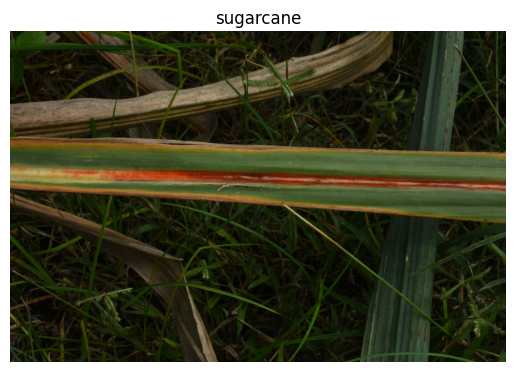

In [17]:
for folder in random.sample(folders, 3):
    folder_path = os.path.join(ds, folder)
    
    image_files = []
    for root, dirs, files in os.walk(folder_path):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):  # only images
                image_files.append(os.path.join(root, f))
    
    if len(image_files) == 0:
        print(f"No images found in {folder}")
        continue
    
   
    img_path = random.choice(image_files)
    
   
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(folder)
    plt.axis("off")
    plt.show()

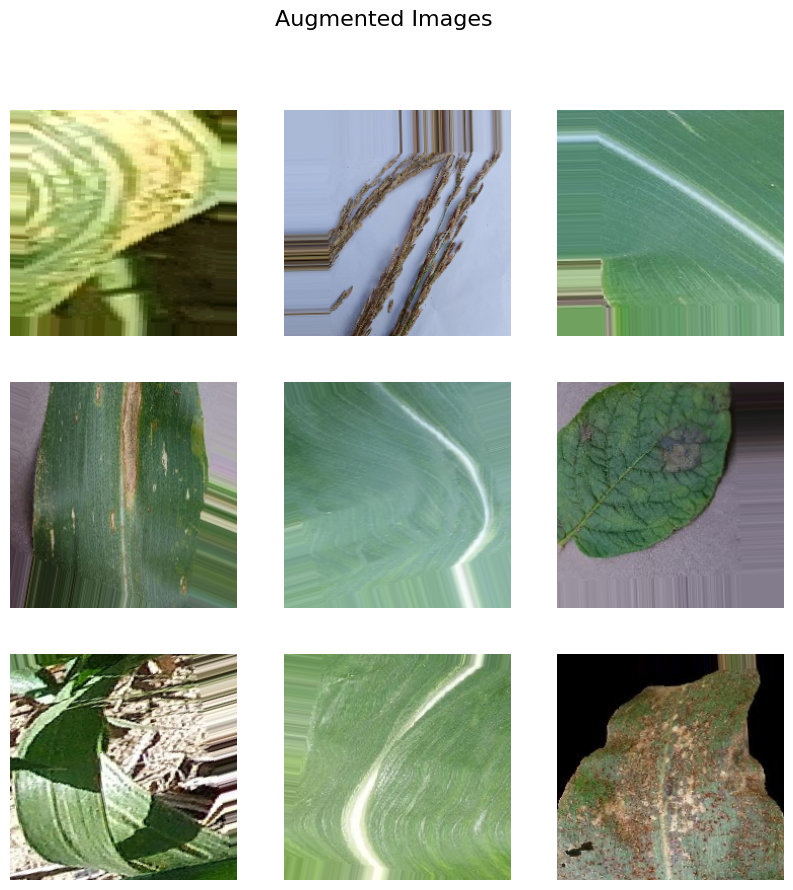

In [19]:
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis("off")
plt.suptitle("Augmented Images", fontsize=16)
plt.show()

In [20]:
print("Image shape:", x_batch[0].shape)
print("Number of classes:", len(train_generator.class_indices))
print("Classes:", train_generator.class_indices)

Image shape: (224, 224, 3)
Number of classes: 5
Classes: {'Corn': 0, 'Potato': 1, 'Rice': 2, 'Wheat': 3, 'sugarcane': 4}
